# Music Informatics: Project

- Vasileios Katsaitis  (1115202000073)
- Dimokritos Kolitsos  (1115201900085)
- Konstantinos Chousos (1115202000215) 

In [1]:
import os
import librosa
import numpy as np
import pandas as pd

sample_rate = 44100
duration = 120 # 2 minutes

def trim_starting_zeros(audio):
    # Find the first non-zero sample
    non_zero_index = np.nonzero(audio)[0]
    if len(non_zero_index) > 0:
        return audio[non_zero_index[0]:]
    return audio

def load_and_trim_audio(file_path):
    audio, sr = librosa.load(file_path, sr=sample_rate)
    
    # Trim any starting silence
    trimmed_audio = trim_starting_zeros(audio)
    
    # Take only the first 'duration' seconds after trimming
    trimmed_audio = trimmed_audio[:duration * sample_rate]
    
    return trimmed_audio

def load_audio_dataset(base_path):
    data = []
    for root, _, files in os.walk(base_path):
        for file in files:
            if file.endswith('.mp3'):
                file_path = os.path.join(root, file)
                # Load, trim silence, and get the first 'duration' seconds
                audio = load_and_trim_audio(file_path)
                genre = os.path.basename(os.path.dirname(file_path))
                data.append({
                    'song_name': file,
                    'genre': genre,
                    'audio': audio,
                })
    return pd.DataFrame(data)

# Load the dataset
df = load_audio_dataset('./data')

In [2]:
import pickle

with open('./data/df.pkl', 'wb') as f:
   pickle.dump(df, f)

del df

In [3]:
with open('./data/df.pkl', 'rb') as f:
   df = pickle.load(f)

In [4]:
display(df)

,song_name,genre,audio
0,BADBADNOTGOOD - Triangle.mp3,jazz,"[2.0198982e-07, 4.6801011e-07, 5.2284656e-07, ..."
1,Better Git It in Your Soul.mp3,jazz,"[-4.883822e-05, -8.148397e-05, -6.910837e-05, ..."
2,Bill Evans Trio - Autumn Leaves.mp3,jazz,"[-7.664842e-18, 1.542549e-17, 7.353884e-18, 1...."
3,But Not for Me.mp3,jazz,"[-2.530606e-05, -1.9366133e-05, -2.9332361e-06..."
4,"Dave Brubeck, The Dave Brubeck Quartet - Take ...",jazz,"[7.638057e-26, 7.6088064e-23, 1.1096656e-21, -..."
5,Miles Davis - So What (Official Audio).mp3,jazz,"[-9.2731755e-28, -9.5840455e-26, -1.2564294e-2..."
6,Prelude In E Minor.mp3,jazz,"[-5.343583e-20, -1.7544941e-18, -2.2898826e-17..."
7,Sans toi.mp3,jazz,"[2.1195379e-07, -1.2095221e-06, -8.977031e-07,..."
8,Scenery.mp3,jazz,"[-5.817014e-23, -3.241941e-21, -2.208053e-20, ..."
9,Snarky Puppy - Shofukan (We Like It Here).mp3,jazz,"[9.836011e-28, 7.7220867e-26, 1.0520382e-24, -..."


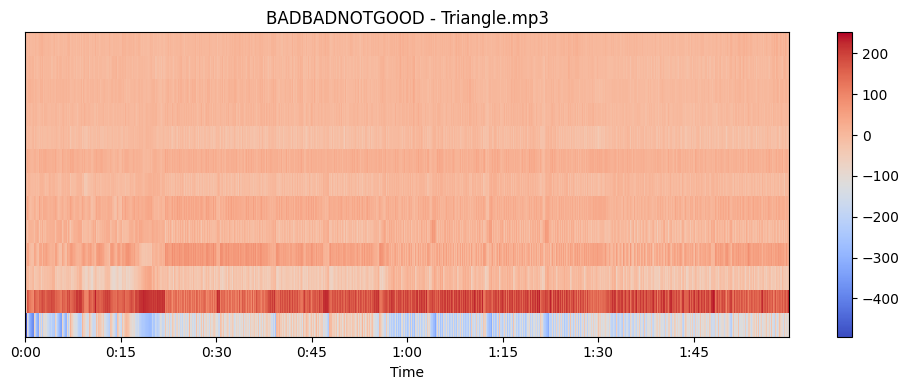

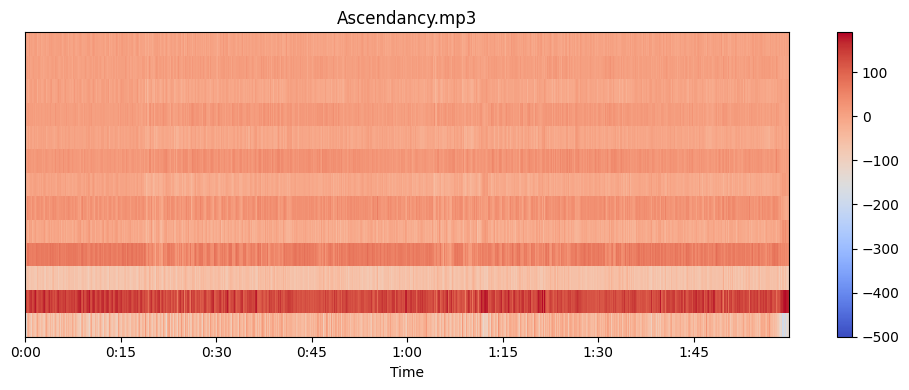

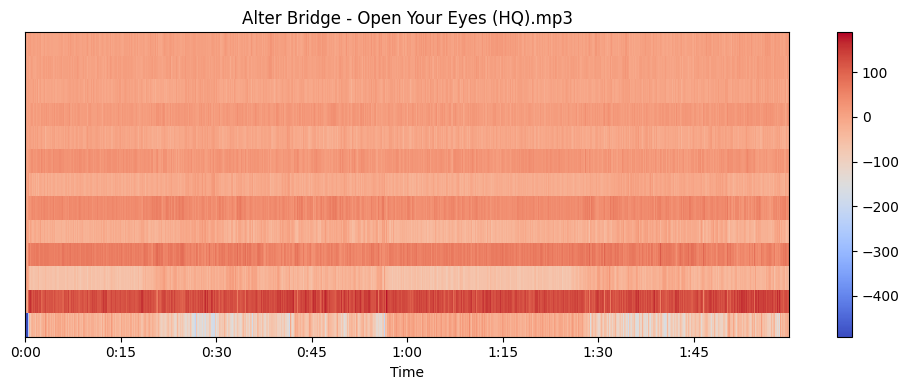

In [6]:
import matplotlib.pyplot as plt
import librosa.display

# Function to extract MFCCs from an audio file
def extract_mfcc(audio, sr, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

# Example function to plot MFCCs for a single song
def plot_mfcc(mfccs, sr, title="MFCC"):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Extract MFCCs for all songs in the dataset
def extract_features_from_dataset(df, n_mfcc=13):
    df['mfcc'] = df['audio'].apply(lambda x: extract_mfcc(x, sample_rate, n_mfcc))
    return df

# Update the dataframe with MFCC features
df = extract_features_from_dataset(df, n_mfcc=13)

# Example visualization for one jazz one metal and one rock song in the dataset
plot_mfcc(df['mfcc'].iloc[0], sample_rate, title=df['song_name'].iloc[0])
plot_mfcc(df['mfcc'].iloc[10], sample_rate, title=df['song_name'].iloc[10])
plot_mfcc(df['mfcc'].iloc[20], sample_rate, title=df['song_name'].iloc[20])

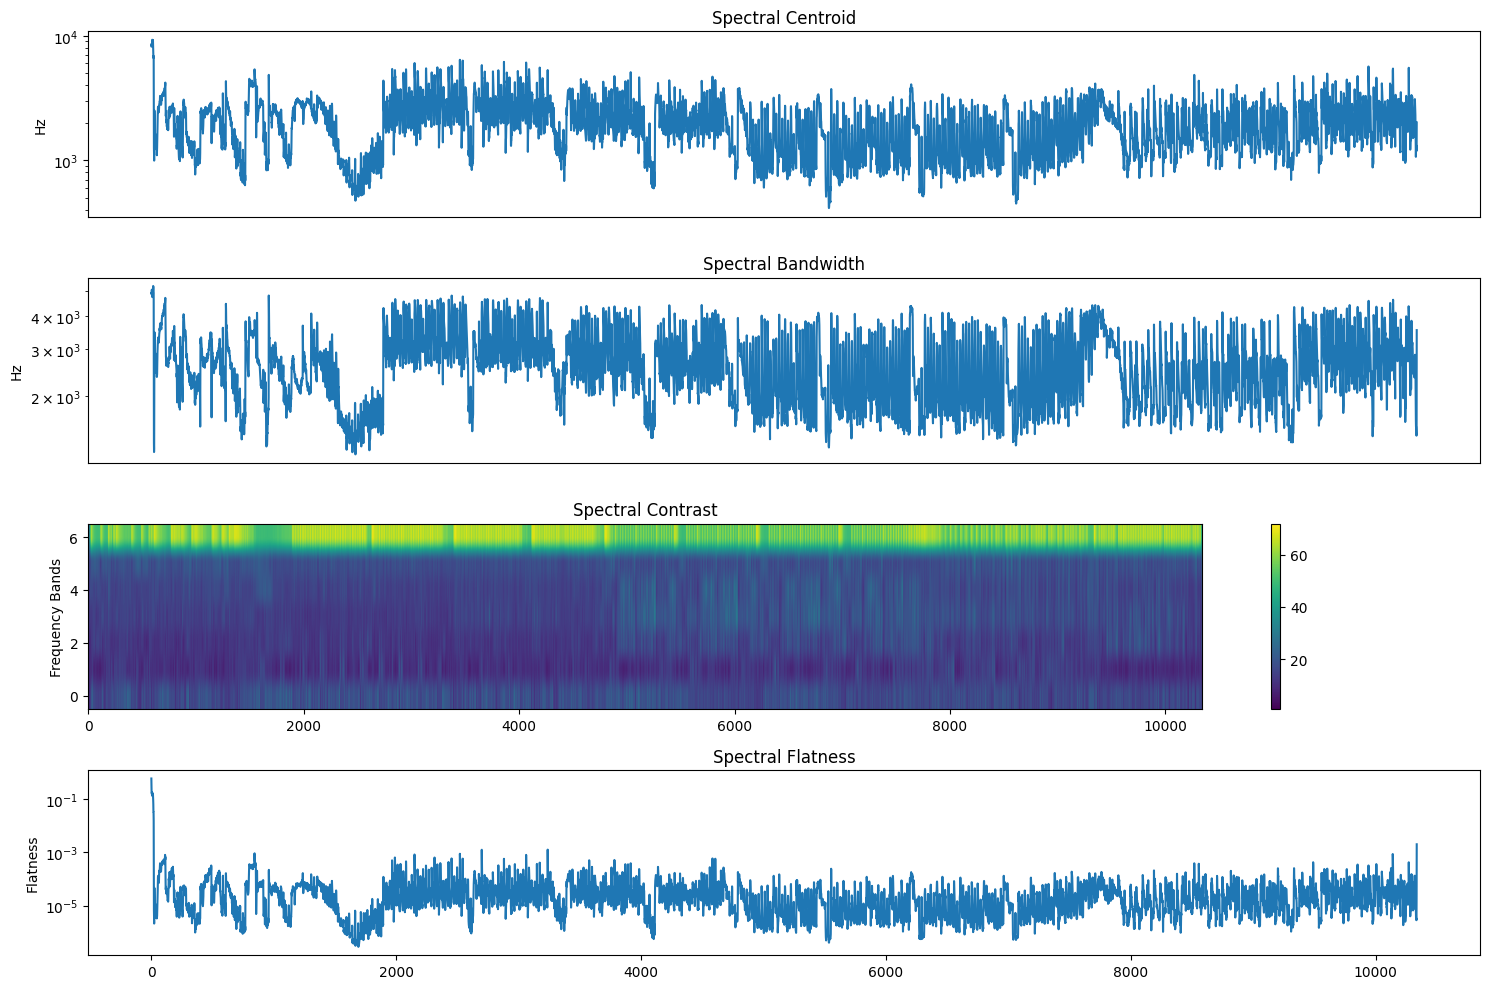

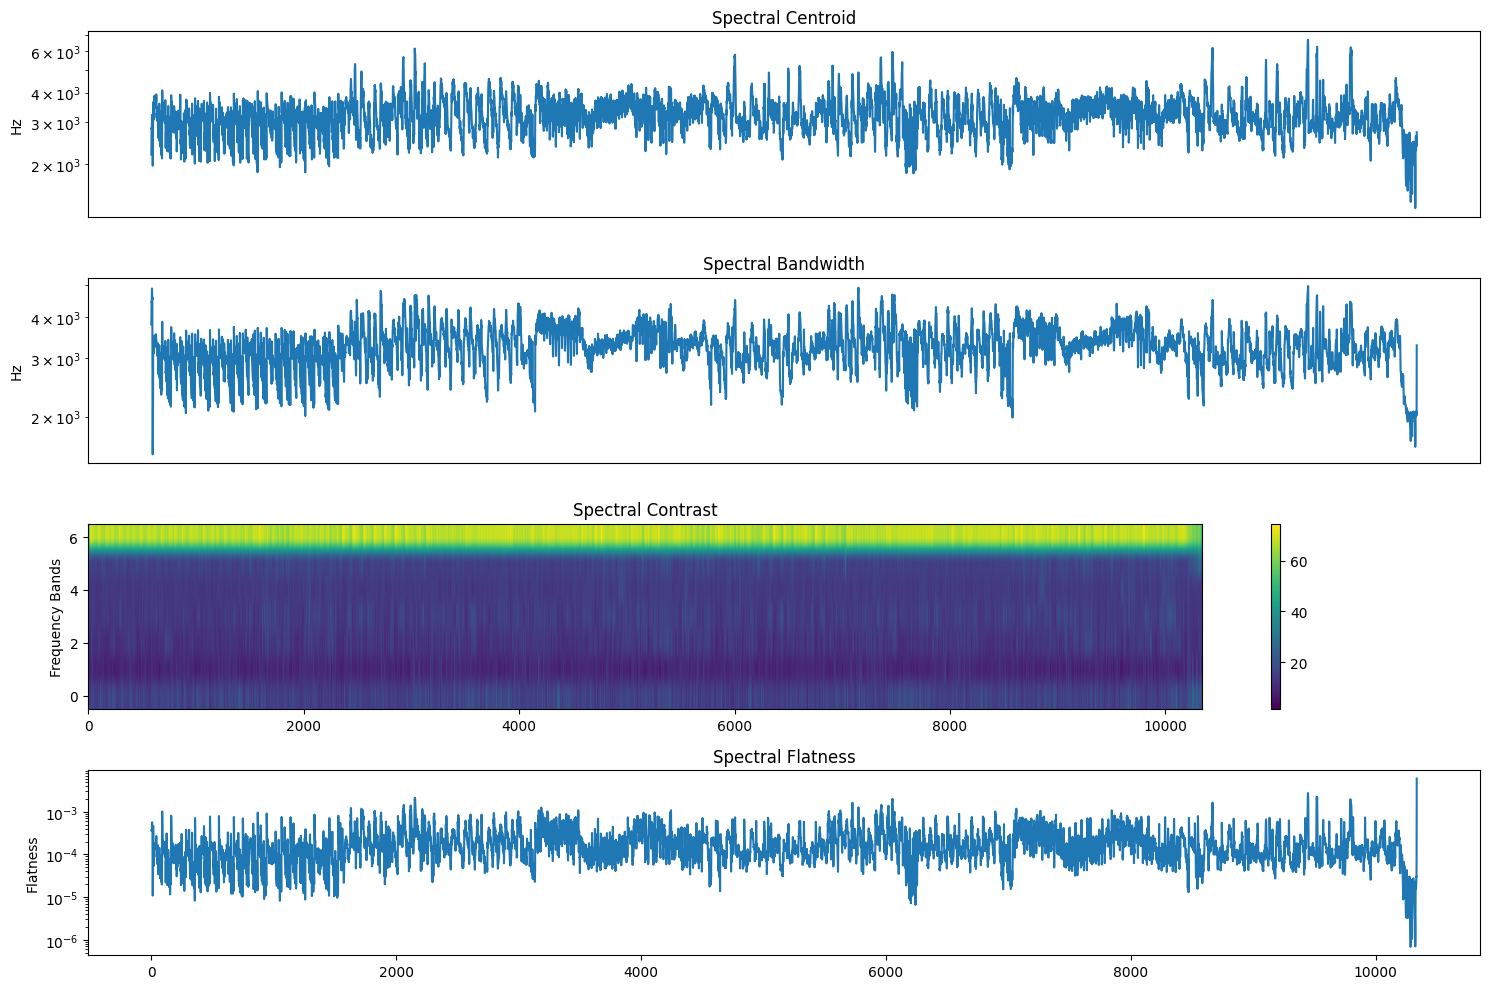

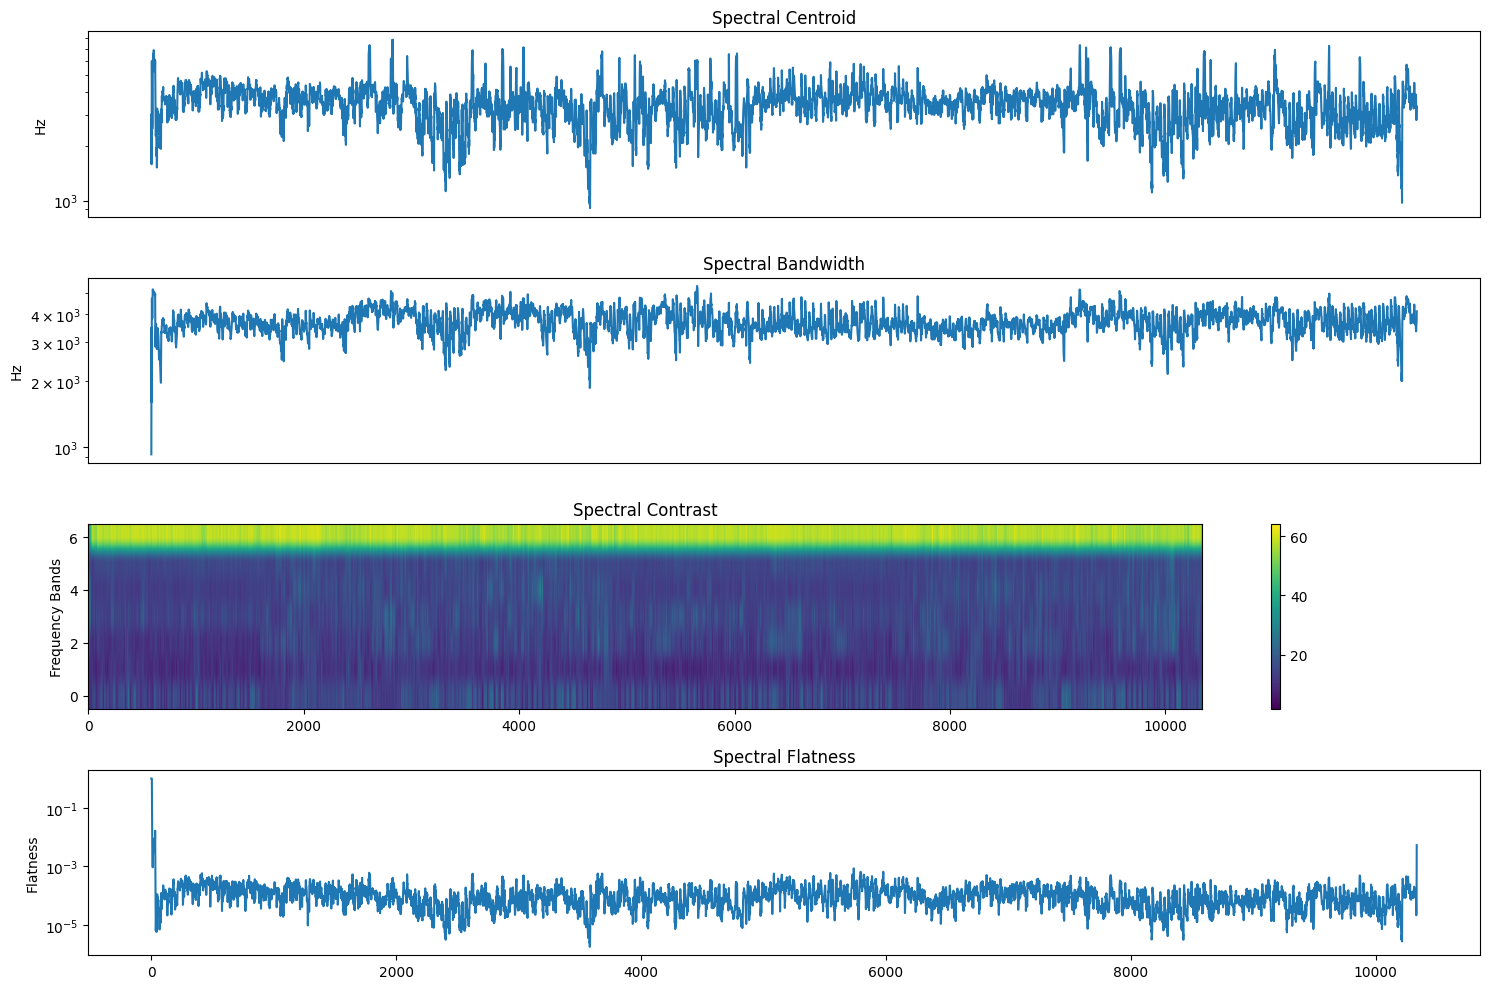

In [7]:
# Function to extract timbre descriptors from an audio file
def extract_timbre_descriptors(audio, sr):
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=audio)
    return spectral_centroid, spectral_bandwidth, spectral_contrast, spectral_flatness

# Example function to plot timbre descriptors for a single song
def plot_timbre_descriptors(descriptors, sr, title="Timbre Descriptors"):
    spectral_centroid, spectral_bandwidth, spectral_contrast, spectral_flatness = descriptors
    plt.figure(figsize=(15, 10))
    
    plt.subplot(4, 1, 1)
    plt.semilogy(spectral_centroid.T, label='Spectral Centroid')
    plt.ylabel('Hz')
    plt.xticks([])
    plt.title('Spectral Centroid')
    
    plt.subplot(4, 1, 2)
    plt.semilogy(spectral_bandwidth.T, label='Spectral Bandwidth')
    plt.ylabel('Hz')
    plt.xticks([])
    plt.title('Spectral Bandwidth')
    
    plt.subplot(4, 1, 3)
    plt.imshow(spectral_contrast, aspect='auto', origin='lower')
    plt.colorbar()
    plt.ylabel('Frequency Bands')
    plt.title('Spectral Contrast')
    
    plt.subplot(4, 1, 4)
    plt.semilogy(spectral_flatness.T, label='Spectral Flatness')
    plt.ylabel('Flatness')
    plt.title('Spectral Flatness')
    
    plt.tight_layout()
    plt.show()

# Extract timbre descriptors for all songs in the dataset
def extract_all_timbre_descriptors(df):
    df['timbre_descriptors'] = df['audio'].apply(lambda x: extract_timbre_descriptors(x, sample_rate))
    return df

# Update the dataframe with timbre descriptors
df = extract_all_timbre_descriptors(df)

# Example visualization for one jazz one metal and one rock song in the dataset
plot_timbre_descriptors(df['timbre_descriptors'].iloc[0], sample_rate, title=df['song_name'].iloc[0])
plot_timbre_descriptors(df['timbre_descriptors'].iloc[10], sample_rate, title=df['song_name'].iloc[10])
plot_timbre_descriptors(df['timbre_descriptors'].iloc[20], sample_rate, title=df['song_name'].iloc[20])